## Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify
import numpy as np

## Data Loading and Pre-processing

In [2]:
file_name =  "ERC_formatted.xlsx"

# loading DataFrames
pocet_obyvatelov = pd.read_excel(io=file_name, sheet_name=0)
narodeni = pd.read_excel(io=file_name, sheet_name=1)
zomreti = pd.read_excel(io=file_name, sheet_name=2)
vnutorna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=3)
vnutorna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=4)
zahranicna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=5)
zahranicna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=6)
priemerna_mzda = pd.read_excel(io=file_name, sheet_name=7)
zamestnanost = pd.read_excel(io=file_name, sheet_name=8)
pocet_gymnazii = pd.read_excel(io=file_name, sheet_name=9)
pocet_strednych_odbornych_skol = pd.read_excel(io=file_name, sheet_name=10)

# arrays of names and dataframes
dataframes = [pocet_obyvatelov, narodeni, zomreti, vnutorna_migracia_pristahovani, vnutorna_migracia_vystahovani, zahranicna_migracia_vystahovani, zahranicna_migracia_pristahovani, priemerna_mzda, zamestnanost, pocet_gymnazii, pocet_strednych_odbornych_skol]
names_of_datagrames = ["pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani", "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestnanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"]

# creating dictionary of dataframes for each year from 2010 to 2021
years = {}
for year in range(2010,2022):
    years[year] = pd.DataFrame(pocet_obyvatelov["Okres"])
    for i in range(len(dataframes)):
        years[year][names_of_datagrames[i]] = dataframes[i][year]


## MISC commands (debug tools)

In [3]:
# MISC getting row of Okres Bratislava I
# print(years[2010][years[2010]["Okres"] == "Okres Bratislava I"])

In [4]:
# # plotting correlation heatmap for every year
# for year in range(2010,2022):
#     correlation_matrix_data = years[year]
    
#     mask = np.triu(np.ones_like(correlation_matrix_data.corr(), dtype=bool))
#     # print(correlation_matrix_data.corr())
#     dataplot=sb.heatmap(correlation_matrix_data.corr(), annot=True, cmap="YlGnBu", mask = mask)

#     # displaying heatmaps
#     plt.show()

In [ ]:
# from scipy.optimize import curve_fit

# # this is the function we want to fit
# def func(x, a, c):
#     return a*x*x + c

# p_opt, p_cov = curve_fit(func, years[YEAR][X], years[YEAR][Y])

# print(p_opt)
# a, c = p_opt
# sb.scatterplot(data=years[YEAR], x=X, y=Y) # hue="Okres"
# sb.lmplot(data=years[YEAR], x=X, y=Y, line_kws={'color': 'red'})
# plt.plot(years[YEAR][X], func(years[YEAR][X], a, c), 'g--', label='fit: a=%5.3f, c=%5.3f' % tuple(p_opt))


## Average correlation heatmap

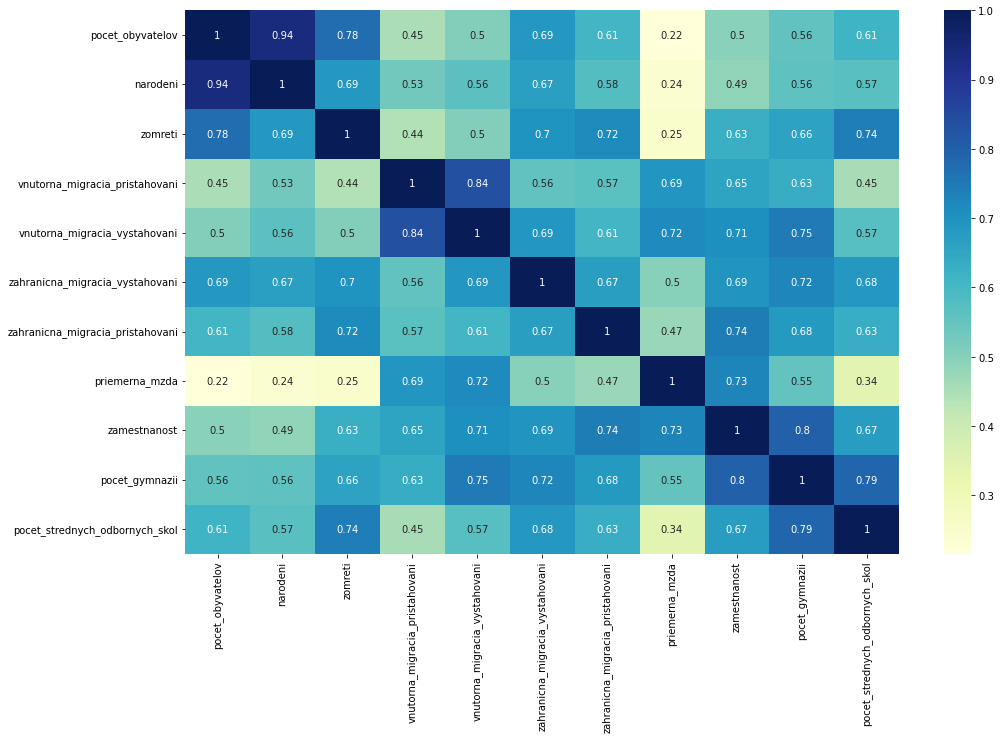

In [5]:
sum_of_correlations = years[2010].corr()

for year in range(2011,2022):
    sum_of_correlations += years[year].corr()

sum_of_correlations = sum_of_correlations / 12

fig, ax = plt.subplots(figsize=(16,10)) 

mask = np.triu(np.ones_like(years[2010].corr(), dtype=bool))
dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)


## Specific correlation plots

In [50]:
# INPUTS
X = "priemerna_mzda"
Y = "zamestnanost"
YEAR = 2021

# function for setting the DPI of the plots
def set_DPI():
    fig, ax = plt.subplots()
    fig.set_dpi(100)


<AxesSubplot:xlabel='priemerna_mzda', ylabel='zamestnanost'>

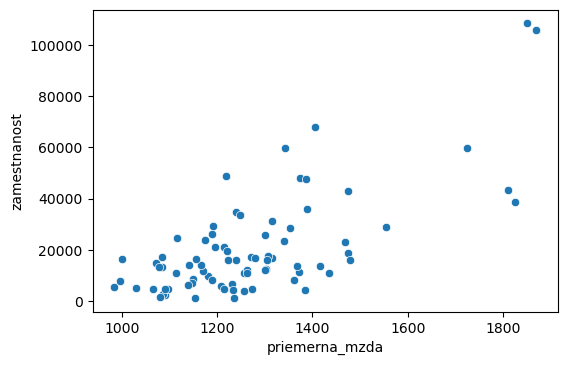

In [51]:
# SIMPLE PLOT OF X AND Y
set_DPI()
sb.scatterplot(data=years[YEAR], x=X, y=Y) # hue="Okres"


<AxesSubplot:xlabel='priemerna_mzda', ylabel='zamestnanost'>

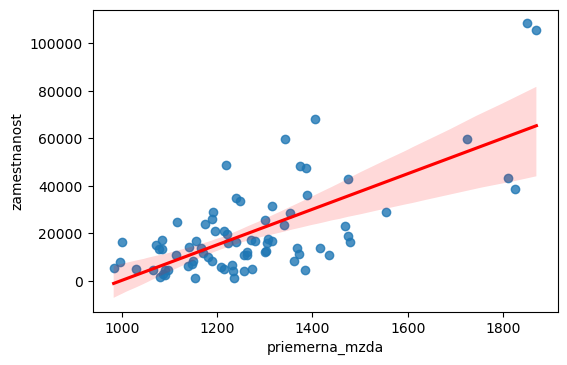

In [55]:
# LINEAR REGRESSION FITED TO PLOT OF X AND Y
set_DPI()
sb.regplot(data=years[YEAR], x=X, y=Y, line_kws={'color': 'red'})

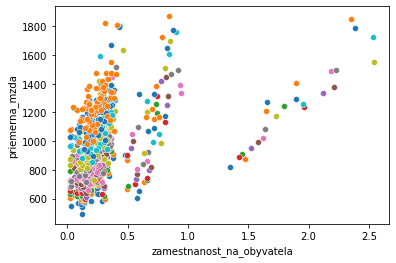

In [58]:
# FEATURE ENGINEERING PART TO DO

# sb.scatterplot(x="zamestanost", y="zahranicna_migracia_pristahovani", data=years[2010])
for year in range(2010,2022):
    years[year]["zamestnanost_na_obyvatela"] = years[year]["zamestnanost"] / years[year]["pocet_obyvatelov"]
    years[year]["zahranicna_migracia_pristahovani_na_obyvatela"] = years[year]["zahranicna_migracia_pristahovani"] / years[2010]["pocet_obyvatelov"]
    # sb.scatterplot(x="zamestnanost_na_obyvatela", y="zahranicna_migracia_pristahovani_na_obyvatela", data=years[year])
    # sb.scatterplot(x="zamestnanost_na_obyvatela", y="priemerna_mzda", data=years[year])

## Heatmap of Slovak districts

In [ ]:
map = gpd.read_file("okresy.json")
geoplot.polyplot(map, projection=gcrs.AlbersEqualArea())
# sort balyes by TXT column A to Z
map = map.sort_values(by=['TXT'])
# reset index
map = map.reset_index(drop=True)
map.head()

In [ ]:
# sort by name A to Z of Okres
for year in range(2010,2022):
    years[year] = years[year].sort_values(by=['Okres'])  
    years[year] = years[year].reset_index(drop=True)
map['heatmap'] = years[2021]["pocet_obyvatelov"]
# years[2021].head(10)
map.sort_values(by=['heatmap'], ascending=False)

In [ ]:
# sort by name A to Z of Okres
for year in range(2010,2022):
    years[year] = years[year].sort_values(by=['Okres'])  
    years[year] = years[year].reset_index(drop=True)
map['heatmap'] = years[2021]["pocet_obyvatelov"]
# years[2021].head(10)
map.sort_values(by=['heatmap'], ascending=False)

In [ ]:
heatmap_data = map["heatmap"]
# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap='YlGnBu', figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)